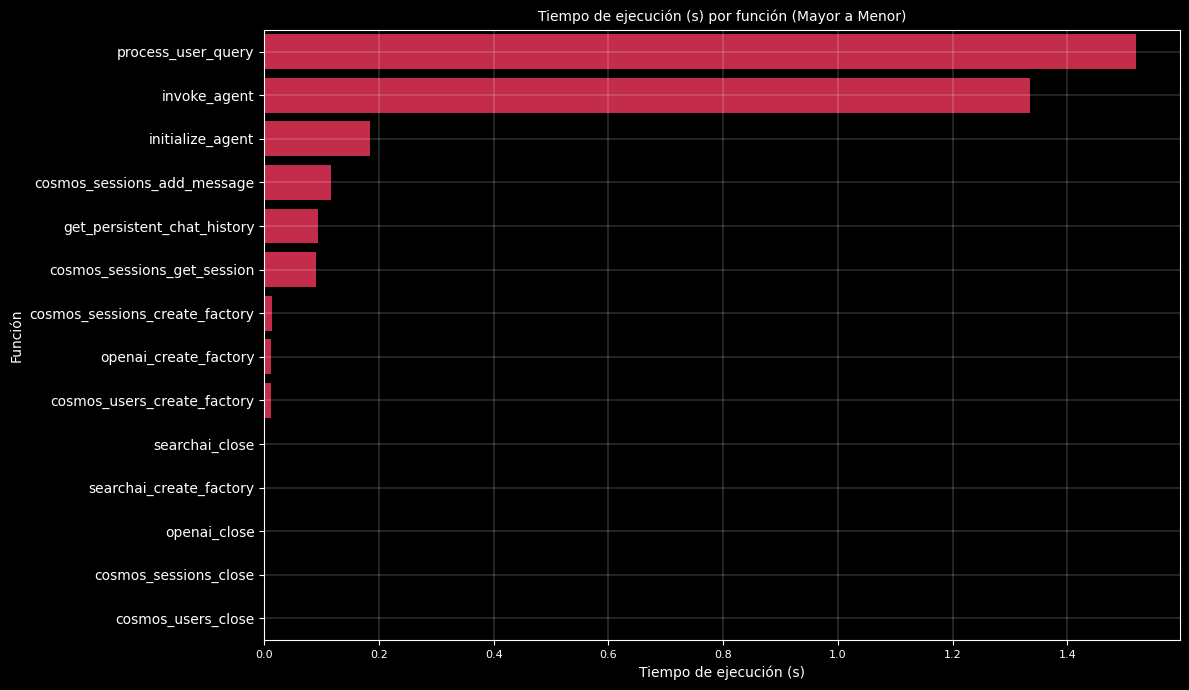

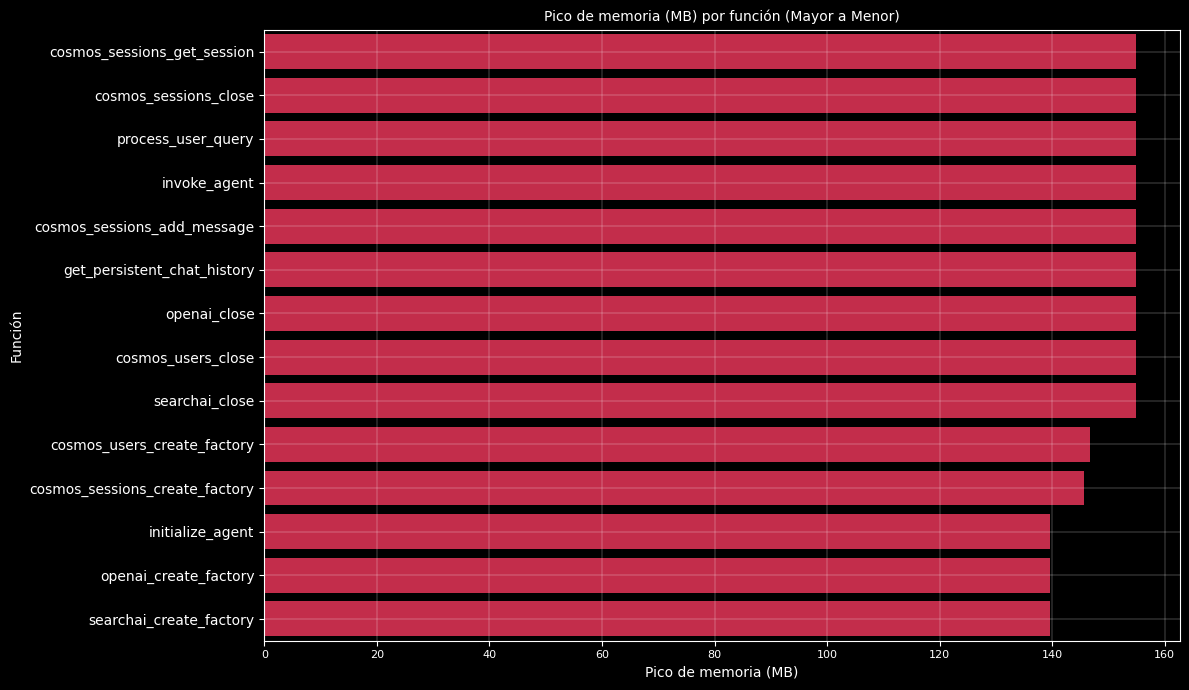

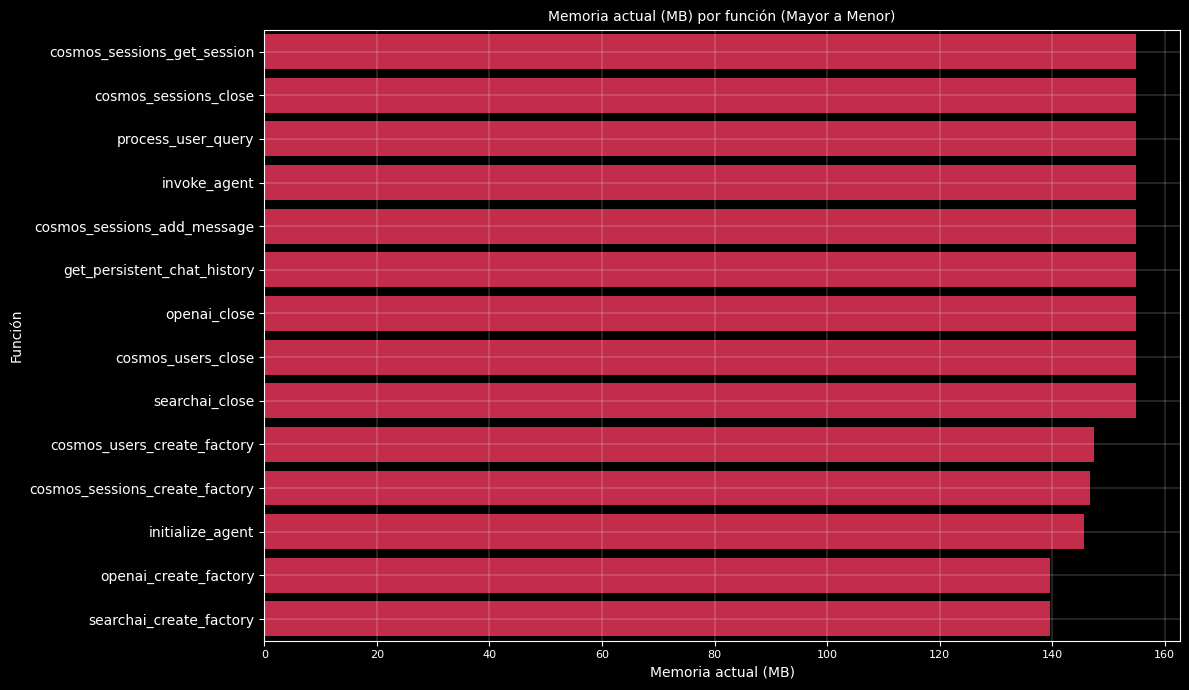

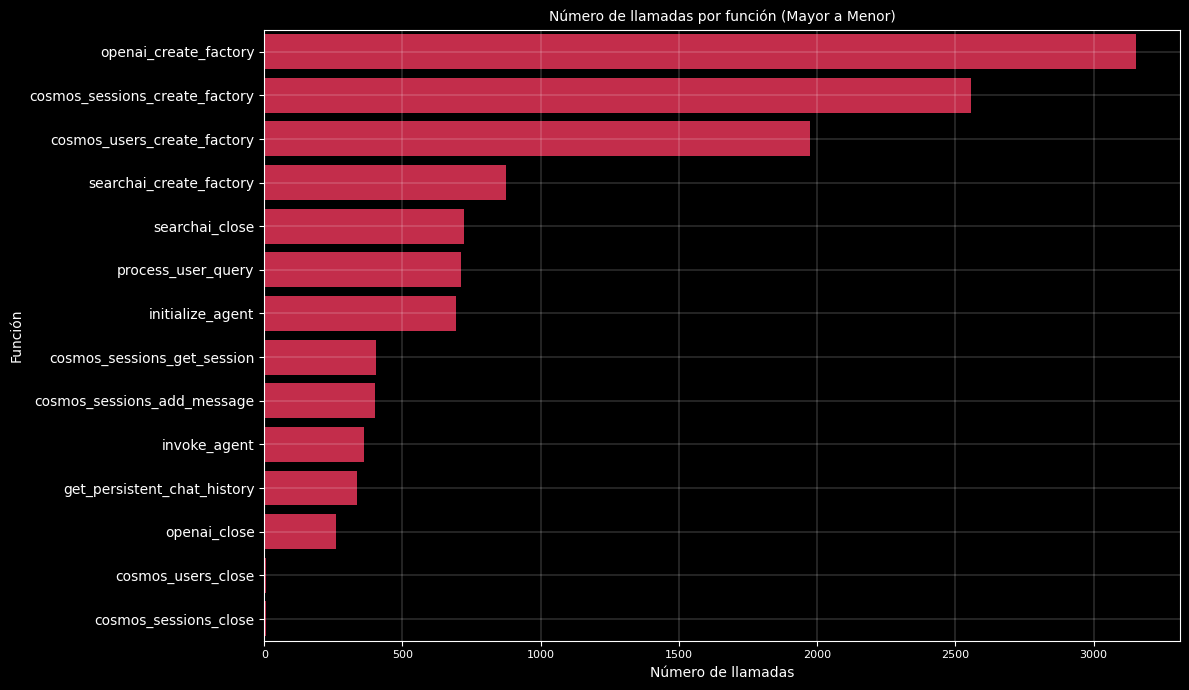

In [1]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Estilos: fondo oscuro de Matplotlib + tema Seaborn ligero
plt.style.use('dark_background')

# 2) Ruta a tu carpeta performance (ajusta si tu CWD difiere)
perf_dir = Path("..") / "performance"
assert perf_dir.exists(), f"No encontré {perf_dir.resolve()}"

# 3) Carga todos los JSON
records: list[dict] = []
for path in perf_dir.glob("*.json"):
    records.append(json.loads(path.read_text()))

# 4) Construye el DataFrame
df = pd.DataFrame(records)

# 5) Función genérica para graficar horizontalmente CON ORDENAMIENTO
def plot_metric(metric: str, ylabel: str):
    if metric not in df.columns:
        print(f"⚠️ Columna '{metric}' no existe.")
        return
    
    # ✅ CAMBIO PRINCIPAL: Ordenar el DataFrame por la métrica (mayor a menor)
    df_sorted = df.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(
        y="function_name",
        color='crimson',
        x=metric,
        linewidth=0.3,
        data=df_sorted,  # ✅ Usar el DataFrame ordenado
        orient="h",
    )
    ax.tick_params(axis="y", labelsize=10)
    ax.tick_params(axis="x", labelsize=8)
    ax.set_ylabel("Función", fontsize=10)
    ax.set_xlabel(ylabel, fontsize=10)
    ax.set_title(f"{ylabel} por función (Mayor a Menor)", fontsize=10)
    plt.tight_layout()
    plt.grid(color='white', linewidth=0.2)
    plt.show()

# 6) Genera todos los gráficos ordenados
plot_metric("execution_time",    "Tiempo de ejecución (s)")
plot_metric("memory_peak_mb",    "Pico de memoria (MB)")
plot_metric("memory_current_mb", "Memoria actual (MB)")
plot_metric("call_count",        "Número de llamadas")